### Table of contents:

* [install required packages](#install)

* [toggle code on off](#toggle)

* [create a dataframe of k8 pull requests](#pr_df)

* [select columns to display per issue](#pr_viz)

* [view pull requests per repo](#per_repo)

* [view pull requests per user](#per_user)

* [view pull requests per reviewer](#per_reviewer)

* [word cloud of repos](#wc-repos)

* [word cloud of users](#wc-users)

* [word cloud of assignees](#wc-assignees)

* [save pull requests to csv file](#save)

## import modules  <a class="anchor" id="install"></a>

In [2]:
import sys
sys.path.insert(0, '../models/')
import pandas as pd
from transform import transform_pr
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

## toggle code on or off  <a class="anchor" id="toggle"></a>

In [17]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## create dataframe for pull requests  <a class="anchor" id="pr_df"></a>

In [3]:
pr= transform_pr()

## view first two rows

In [4]:
pr.head(2)

,repo,requested_reviewers,assignee,author_association,created_at,state,number,issue_url,user_,node_id,url,id
0,aws-jmeter-test-engine,None,None,COLLABORATOR,2020-10-27T04:30:34Z,open,84,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/issues/84,uzfarid,MDExOlB1bGxSZXF1ZXN0NTEwNDU5OTcx,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/pulls/84,510459971
1,aws-jmeter-test-engine,NadHodeGW,None,COLLABORATOR,2020-10-25T17:30:56Z,open,82,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/issues/82,uzfarid,MDExOlB1bGxSZXF1ZXN0NTA5NjI5NDgz,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine/pulls/82,509629483


## choose what to display per row  <a class="anchor" id="pr_viz"></a>

In [5]:
# choose what to be displayed
df = pr.copy()
df = df[['repo', 'requested_reviewers', 'assignee', 'created_at', 'state', 'user_', 'url']]

## view pull requests per repo  <a class="anchor" id="per_repo"></a>

In [8]:
# pull requests per repo
items = ['All']+sorted(df['repo'].unique().tolist())
def view(Repo=''):
    if Repo=="All": display(df)
    display(df[df.repo==Repo].reset_index(drop=True))
w = widgets.Select(options=items)

In [9]:
interactive(view, Repo=w)

interactive(children=(Select(description='Repo', options=('All', 'GW-proxy', 'aws-jmeter-test-engine', 'gp-jir…

## view pull requests per user  <a class="anchor" id="per_user"></a>

In [10]:
items = ['All']+sorted(df['user_'].unique().tolist())
def view(User=''):
    if User=="All": display(df)
    display(df[df.user_==User].reset_index(drop=True))
w = widgets.Select(options=items)

In [11]:
interactive(view, User=w)

interactive(children=(Select(description='User', options=('All', 'GINAGC', 'MaNe2020', 'MariuszFerdyn', 'prana…

## view pull requests per requested reviewer  <a class="anchor" id="per_reviewer"></a>

In [12]:
items = ['All']+df['requested_reviewers'].unique().tolist()
items = [x for x in items if x is not None]
def view(Reviewer=''):
    if Reviewer=="All": display(df)
    display(df[df.requested_reviewers==Reviewer].reset_index(drop=True))
w = widgets.Select(options=items)

In [13]:
interactive(view, Reviewer=w)

interactive(children=(Select(description='Reviewer', options=('All', 'NadHodeGW', 'uzfarid', 'b24repo'), value…

## word cloud for repos  <a class="anchor" id="wc-repos"></a>

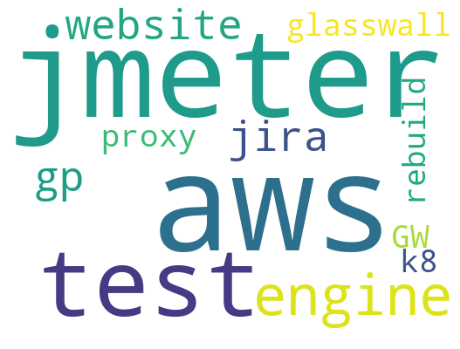

In [14]:
x2011 = pr.repo
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('repos.png')
plt.show()

## word cloud for users  <a class="anchor" id="wc-users"></a>

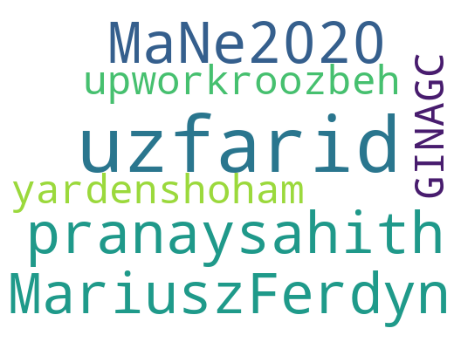

In [15]:
x2011 = pr.user_
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('users.png')
plt.show()

## save pull requests to file <a class="anchor" id="save"></a>

In [16]:
df.to_csv("../data/pull_requests.csv", index=False)